<a href="https://colab.research.google.com/github/aliciavaquero/Procesamiento-de-Im-genes-con-IA/blob/main/Actividad_1_Bloque_2_Alicia_Vaquero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

Bienvenidos a la Actividad 1, donde pondremos en práctica todo lo aprendido durante el bloque 2. Esta actividad la realizaremos en clase, se terminará en casa (debería completarse en clase) y se entregará el día *8 de octubre*.

## ¿En qué consiste?

Vamos a poner en práctica cuatro aspectos del procesamiento de imágenes:
- Lectura de imagen y conversión a escala de grises
- _Umbralización_ de una imagen siguiendo los métodos vistos en clase (y comparándolos)
- _Morfología matemática_ con los operadores conocidos
- _Detección y medida de objetos_ dentro de la imagen. Este último aspecto lo veremos más adelante en el curso, con lo cual, lo que haremos aquí será sencillo y guiado (pero requerirá un esfuerzo pequeño para enfrentaros a un problema que no habéis visto antes)

La finalidad es sencilla. Se os dará una imagen, a color, que tiene varias tonalidades y que está pintada con círculos.

**La actividad consiste en contar el número de círculos de la imagen.**
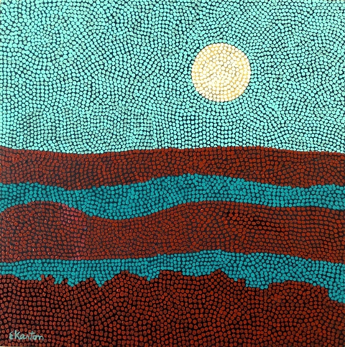

## Evaluación

Se evaluará de la siguiente manera:
- 0 puntos si no se presenta o si sólo se presenta el enunciado con modificaciones mínimas o si el ejercicio no resuelve el problema.
- 5 puntos si se presenta únicamente la resolución del ejercicio (en este caso un proceso que calcule el número de puntos), pero no se justifica los pasos realizados o no se comentan los resultados (comparación entre umbralizaciones, por ejemplo).
- 5-10 puntos, dependiendo de los comentarios realizados y de la profundidad de las explicaciones.

## Formato de entrega
- Se pide entregar el ejercicio de dos maneras:
-- En formato .py (con el código puro)
-- En formato .html

No se aceptará el formato .ipynb
Habilitaré una actividad en Canvas para que podáis subir ambos archivos.

# Inicialización

En primer lugar, cargamos todos los paquetes/frameworks que nos van a hacer falta. Se recomienda visitar la web: https://scikit-image.org/ para ver todas las funcionalidades que permite Scikit Image.

In [ ]:
# Paquetes necesarios para la realización de esta práctica (no son necesarios conocerlos ni entenderlos por ahora)
from skimage.io import imread
from skimage import transform as tf

import matplotlib.pyplot as plt

# Cargamos la función para convertir de RGB a Escala de grises
from skimage.color import rgb2gray

In [ ]:
# Paquete y funciones para realizar una umbralización con Scikit-image
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

# Estas dos funciones nos sirven para detectar los objetos dentro de una imagen binaria
from skimage.morphology import label
from skimage.measure import regionprops

In [ ]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img, title):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(title)
    plt.show()

## Cargar la imagen

Lo primero de todo, vamos a leer la imagen. Recuerda que hay que subir la imagen cada vez que _inicies sesión_ en el notebook y que la ruta se mira haciendo botón derecho sobre el archivo.

Con lo cual, aquí vamos a hacer dos cosas:
- Cargar la imagen
- Convertirla a escala de grises

Hacemos esto para luego posteriormente umbralizar la imagen en escala de grises.

In [ ]:
# Cargar la imagen
imagen = imread('/Pintura_Puntos.jpg')

Para cargar la imagen, primero hay que cargar la imagen dentro de colab.research y posteriormente poner la ruta de la imagen en la página.

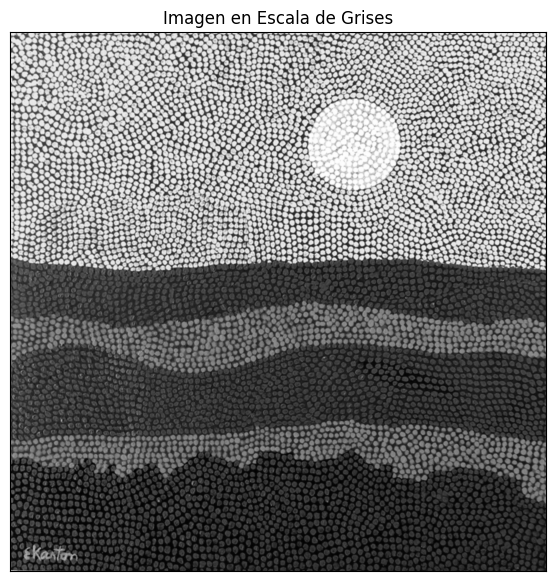

In [ ]:
# Convertir la imagen a escala de grises
imagen_gris = rgb2gray(imagen)
imshow(imagen_gris, "Imagen en Escala de Grises")

Hemos cargado la imagen, la hemos convertido a escala de grises y la hemos mostrado en una ventana de visualización utilizando la función.

## Umbralizar la imagen con varios métodos

Vamos a probar ahora diferentes métodos para umbralizar la imagen. Se pide en esta actividad:
- Ejecutar cada método (para ello tendréis que ver en la documentación cómo invocarlo y qué parámetros necesita)
- Mostrar por pantalla el resultado de cada imagen, añadiendo una explicación de a qué corresponde cada imagen
- Hacer una comparación general de todos (es decir, cuál da mejores resultados, aspectos que observeis, etc...)
- Explicar a qué tipo corresponden los métodos de threshold_niblack y threshold_sauvola
- Por último, ¿se obtiene el mismo resultado si se rota la imagen 180º?¿Por qué?

Los tres métodos más importantes para umbralizar son: Umbralización global, umbralización adaptativa y por último el método de Otsu.

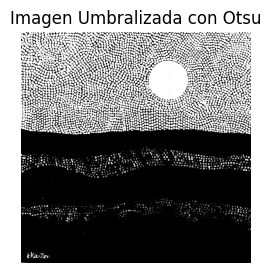

In [ ]:
# Umbralización Global y Método de Otsu

# Calcular el umbral óptimo utilizando el método de Otsu
umbral_otsu = threshold_otsu(imagen_gris)

# Aplicar la umbralización de Otsu a la imagen
imagen_umbralizada = imagen_gris > umbral_otsu

# Mostrar la imagen umbralizada
plt.figure(figsize=(3, 3))
plt.imshow(imagen_umbralizada, cmap=plt.cm.gray)
plt.title("Imagen Umbralizada con Otsu")
plt.axis('off')
plt.show()

Este método busca automáticamente un umbral en una imagen en escala de grises para separar los píxeles en dos clases (objetos y fondo) de manera que maximice la varianza entre las intensidades de los píxeles de estas dos clases. Por esta razón vemos la imagen mucho más contrastada y no nos es de gran ayuda en nuestro objetivo de contar círculos.

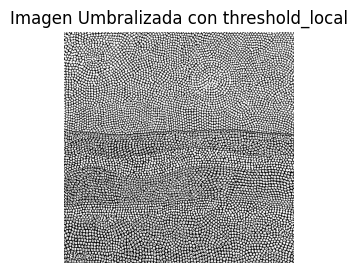

In [ ]:
 # Umbralización Adaptativa usando 'threshold_local'

 # Definir el tamaño de la ventana para la umbralización local
tamaño_ventana = 27

# Aplicar la umbralización local
imagen_umbralizada_local = threshold_local(imagen_gris, tamaño_ventana, offset=0)

# Aplicar la umbralización a la imagen
imagen_umbralizada2 = imagen_gris > imagen_umbralizada_local

# Mostrar la imagen umbralizada
plt.figure(figsize=(3, 3))
plt.imshow(imagen_umbralizada2, cmap=plt.cm.gray)
plt.title("Imagen Umbralizada con threshold_local")
plt.axis('off')
plt.show()

Este método es útil porque permite la umbralización adaptativa, lo que significa que calcula umbrales locales en áreas pequeñas de la imagen. Una ventana más pequeña es preferible en ciertos casos debido a que resalta detalles finos, se adapta a cambios rápidos en la intensidad y mejora el contraste local, como en este caso en el que pretendemos separar bien los círculos del mosaico. La ventana debe ser impar para así evitar problemas de simetría y centrarlo alrededor de cada píxel.

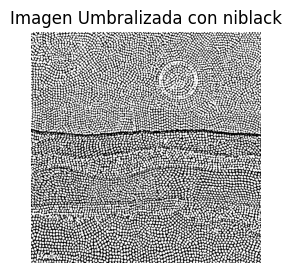

In [ ]:
# Umbralización Adaptativa usando 'threshold_niblack'

# Calcular el umbral local utilizando threshold_niblack
umbral_niblack = threshold_niblack(imagen_gris, window_size=55)

# Aplicar la umbralización a la imagen
imagen_umbralizada_niblack = imagen_gris > umbral_niblack

# Mostrar la imagen umbralizada
plt.figure(figsize=(3, 3))
plt.imshow(imagen_umbralizada_niblack, cmap=plt.cm.gray)
plt.title("Imagen Umbralizada con niblack")
plt.axis('off')
plt.show()

Este método de umbralización adaptativa utiliza una ventana de 55x55 píxeles alrededor de cada píxel para calcular umbrales locales basados en la media y la desviación estándar. Este método es útil en nuestro caso porque permite realizar una umbralización adaptativa que se ajusta a las condiciones locales de la imagen, lo que facilita la detección de detalles finos, nuestros cículos.

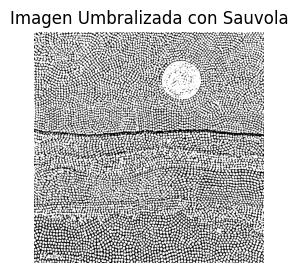

In [ ]:
# Umbralización Adaptativa usando 'threshold_sauvola'

# Calcular el umbral local utilizando threshold_sauvola
umbral_sauvola = threshold_sauvola(imagen_gris, window_size=55)

# Aplicar la umbralización a la imagen
imagen_umbralizada_sauvola = imagen_gris > umbral_sauvola

# Mostrar la imagen umbralizada
plt.figure(figsize=(3, 3))
plt.imshow(imagen_umbralizada_sauvola, cmap=plt.cm.gray)
plt.title("Imagen Umbralizada con Sauvola")
plt.axis('off')
plt.show()

Este método calcula umbrales adaptativos para cada píxel en función de la media y la desviación estándar de una ventana local alrededor de ese píxel. Esto permite que Sauvola sea útil para imágenes con iluminación variable, resaltando detalles finos y siendo menos susceptible al ruido en comparación con la umbralización global.

**Hacer una comparación general de todos (es decir, cuál da mejores resultados, aspectos que observeis, etc...)**

---


Los mejores resultados los hemos obtenido haciendo uso del metodo adaptativo usando threshold local, puesto que para el objetivo que tenemos (contar cuantos círculos hay en la imagen) es el que mejor sirve; en este no se juntan los círculos del mosaico y podemos diferenciarlos bien unos de otros. Sin embrago, en los otros modelos, encontramos como muchos cículos se juntan impidiendo la delimitación individual de cada uno dificultando su posterior contabilización.

Las diferencias entre los distintos métodos de umbralización radican en cómo calculan los umbrales y cómo se adaptan a la variabilidad de intensidad en las imágenes. La elección entre ellos depende de las características específicas de la imagen y los resultados deseados.


**Explicar a qué tipo corresponden los métodos de threshold_niblack y threshold_sauvola**

---

Ambos métodos, threshold_niblack y threshold_sauvola, se utilizan para realizar la umbralización adaptativa, lo que significa que calculan umbrales locales para diferentes regiones de la imagen, lo que puede ser beneficioso cuando se trabaja con imágenes con iluminación no uniforme o variaciones locales en el contraste.

**Por último, ¿se obtiene el mismo resultado si se rota la imagen 180º?¿Por qué?**

---

También vamos a representar la imagen girada 180º aplicando la umbralización local para ver si el resultado es el mismo:

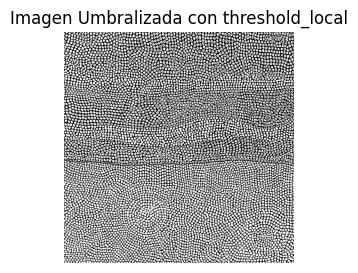

In [ ]:
# Rotar la imagen
from skimage.transform import rotate
imagen_rotada = rotate(imagen_gris, 180)

 # Definir el tamaño de la ventana para la umbralización local
tamaño_ventana = 27

# Aplicar la umbralización local
imagen_umbralizada_local_180 = threshold_local(imagen_rotada, tamaño_ventana, offset=0)

# Aplicar la umbralización a la imagen
imagen_umbralizada_180 = imagen_rotada > imagen_umbralizada_local_180

# Mostrar la imagen ubralizada
plt.figure(figsize=(3, 3))
plt.imshow(imagen_umbralizada_180, cmap=plt.cm.gray)
plt.title("Imagen Umbralizada con threshold_local")
plt.axis('off')
plt.show()


Ambas imágenes, tanto la rotada 180º como la original, tienen un patrón de umbralización igual o practicamente igual.

Esto se debe a que los métodos de umbralización adaptativos, como threshold_local calcula umbrales locales para cada región de la imagen (como hemos dicho anteriormente). La orientación global de la imagen se invierte, pero las distribuciones locales de intensidad en pequeñas regiones no necesariamente cambian significativamente. Esto significa que, aunque la orientación global de la imagen es diferente, las características locales de intensidad en pequeñas regiones pueden seguir siendo similares.

In [ ]:
# Este es el mejor resultado que tendríais que alcanzar

In [ ]:
# Os tendría que ir quedando una cosa así

# Morfología Matemática

Como se puede apreciar en la imagen hay varios elementos imperfectos:
- Hay círculos que están en contacto con otros círculos
- Hay círculos que están huecos por centro
- Hay círculos que no están cerrados del todo

Mediante el uso de morfología matemática (concretamente los cuatro operadores visto en clase) y los posibles elementos estructurales existentes, se pide:
- Decidir qué elemento estructural, y por qué, es el más adecuado. Indicar también el tamaño del elemento estructural que se ha decidido escoger.
- ¿Qué operador o secuencia de operadores elegiríais?
- Una vez elegido operador y elemento estructural, repetir este mismo proceso (es decir, elegir operador y elemento estructural), para la imagen _complementaria_, ¿qué conclusiones sacas de esto?


Los cuatro operadores matemáticos principales son: Erosión Dilatación, Apertura y Clausura

Vamos a usar la imagen umbralizada para aplicar la morfología matemática. Ya que tenemos una imagen binaria que representa mejor los círculos. Usando la morfología matemática podemos afinar la forma de los objetos binarios y facilitar la tarea de contarlos.

<ipython-input-43-aaa5c4768a63>:5: FutureWarning: `selem` is a deprecated argument name for `erosion`. It will be removed in version 1.0. Please use `footprint` instead.
  imagen_erosion = erosion(imagen_umbralizada2, selem=kernel)


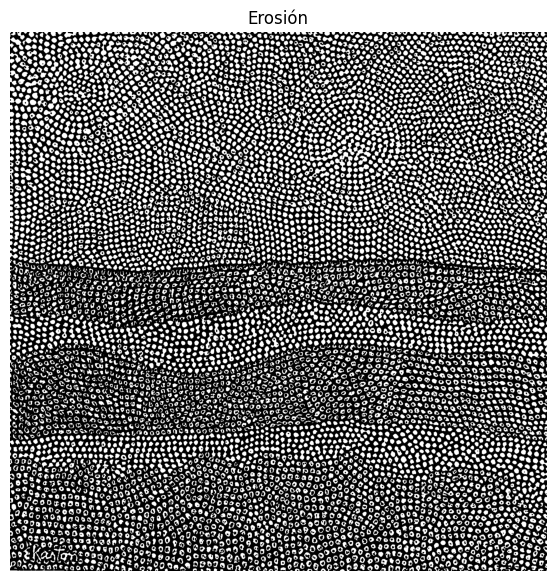

In [ ]:
# Erosión utilizando como elemento estructural un cuadrado

# Realizar la erosión en la imagen umbralizada mediante threshold_local
kernel = rectangle(3,3)
imagen_erosion = erosion(imagen_umbralizada2, selem=kernel)

# Mostrar la imagen
plt.figure(figsize=(7, 7))
plt.imshow(imagen_erosion, cmap=plt.cm.gray)
plt.title("Erosión")
plt.axis('off')
plt.show()

Junto con la imagen anterior, aparecía un mensaje de advertencia que se debía a un cambio en la biblioteca Scikit-image. El argumento *selem* en la función erosion se considera obsoleto, y en versiones futuras de Scikit-image se eliminará. En su lugar, se debe utilizar el argumento *footprint* para especificar el elemento estructural.

Por ello, repetimos el código utilizando el argumento *footprint*:

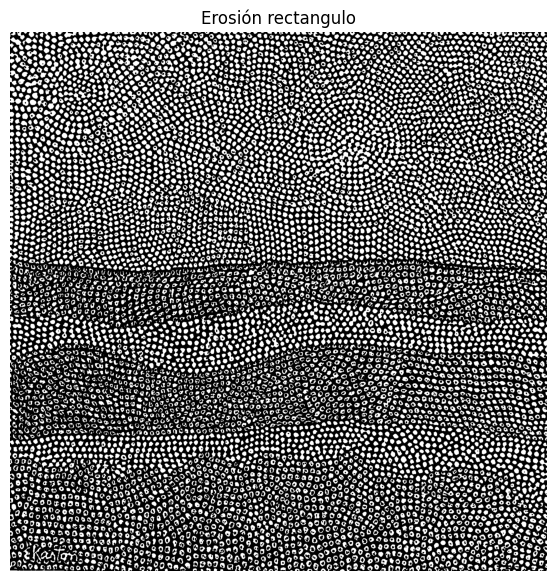

In [ ]:
# Realizar la erosión en la imagen umbralizada mediante threshold_local
kernel1 = rectangle(3,3)
imagen_erosion = erosion(imagen_umbralizada2, footprint=kernel1)

# Mostrar la imagen
plt.figure(figsize=(7, 7))
plt.imshow(imagen_erosion, cmap=plt.cm.gray)
plt.title("Erosión rectangulo")
plt.axis('off')
plt.show()

En la imagen erosionada se aprecia como los bordes se han eliminado y como nos hemos quedado únicamente con el núcleo del objeto; de ahí que los contornos de los círculos se hayan potenciado.

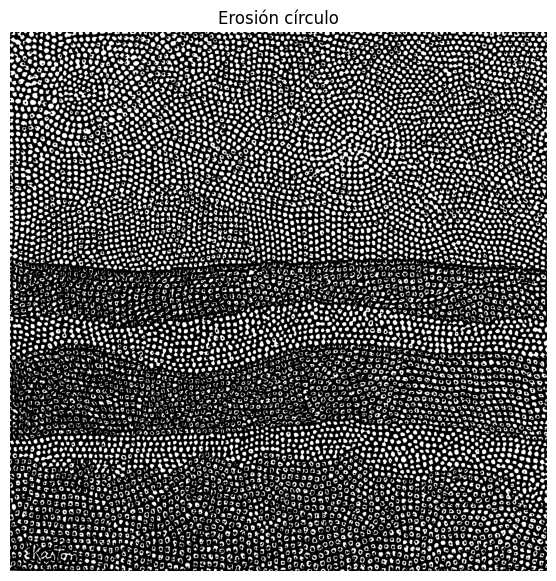

In [ ]:
# Erosión utilizando como elemento estructural un círculo

# Realizar la erosión en la imagen umbralizada
radio = 2
kernel2 = disk(radio)
imagen_erosion2 = erosion(imagen_umbralizada2, footprint=kernel2)

# Mostrar la imagen
plt.figure(figsize=(7, 7))
plt.imshow(imagen_erosion2, cmap=plt.cm.gray)
plt.title("Erosión círculo")
plt.axis('off')
plt.show()

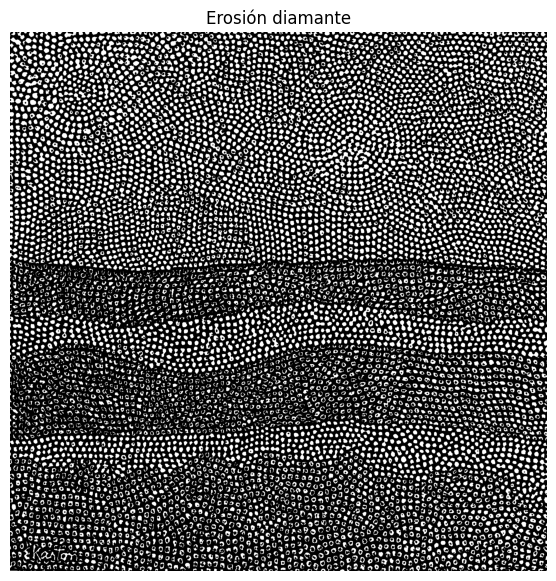

In [ ]:
# Erosión utilizando como elemento estructural un diamante

# Realizar la erosión en la imagen umbralizada
radio = 2
kernel3 = diamond(radio)
imagen_erosion3 = erosion(imagen_umbralizada2, footprint=kernel3)

# Mostrar la imagen
plt.figure(figsize=(7, 7))
plt.imshow(imagen_erosion3, cmap=plt.cm.gray)
plt.title("Erosión diamante")
plt.axis('off')
plt.show()

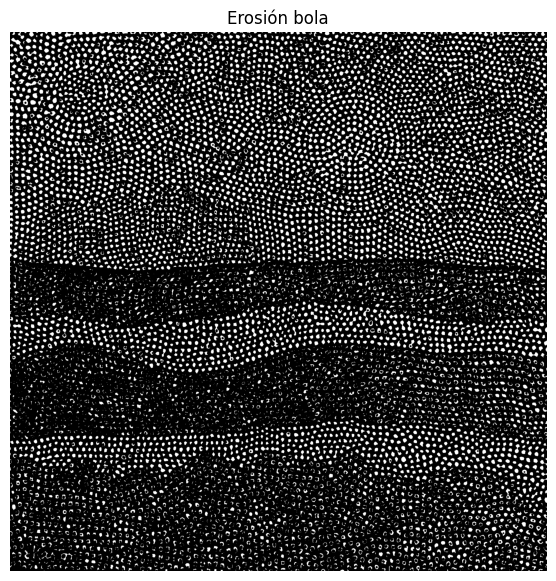

In [ ]:
# Erosión utilizando como elemento estructural una bola

# Realizar la erosión en la imagen umbralizada

from skimage import io, morphology
radio = 3
footprint = morphology.disk(radio)
imagen_erosion4 = morphology.erosion(imagen_umbralizada2, footprint)

# Mostrar la imagen
plt.figure(figsize=(7, 7))
plt.imshow(imagen_erosion4, cmap=plt.cm.gray)
plt.title("Erosión bola")
plt.axis('off')
plt.show()

Después de haber observado la diferencia entre los distintos elementos estructurales. El que peor funciona es la bola, puesto que no ayuda a la diferenciacion de los círculos. Por otro lado, los diamentes, cuadrados y círculos nos dan resultados muy similares. No obstante vamos a aplicar en las siguientes morfologías el círculo.
El mosaico está formado por pequeños círculos por lo que usar un elemento estructural circular que se ajusta mejor a la forma de los objetos, preserva las características naturales de los círculos y reduce la distorsión en comparación con elementos estructurales rectangulares, lo que facilita la segmentación y mejora la calidad de procesamiento de imágenes.

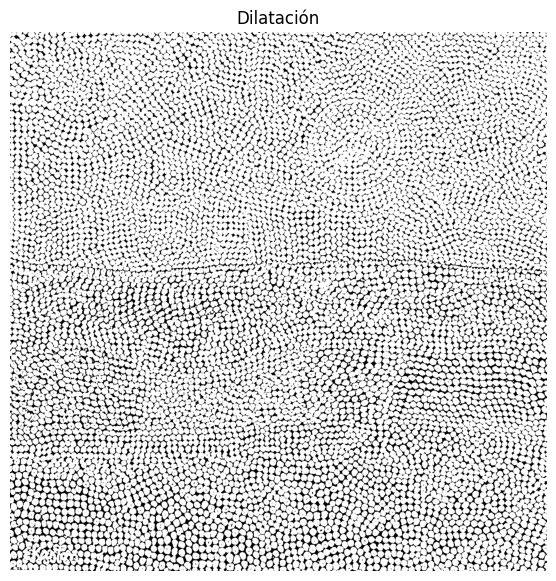

In [ ]:
# Dilatación

# Realizar la dilatación en la imagen umbralizada
radio = 2
kernel = disk(radio)
imagen_dilatacion = dilation(imagen_umbralizada2, footprint=kernel)

# Mostrar la imagen
plt.figure(figsize=(7, 7))
plt.imshow(imagen_dilatacion, cmap=plt.cm.gray)
plt.title("Dilatación")
plt.axis('off')
plt.show()

En la imagen dilatada, se observa como los bordes se han aumentado quedándonos con el núcleo de los circulos ampliado.

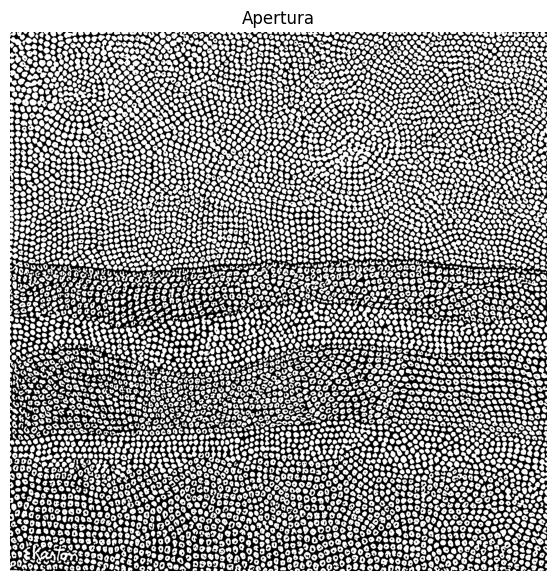

In [ ]:
# Apertura

# Realizar la operación de apertura en la imagen umbralizada
radio = 2
kernel = disk(radio)
imagen_apertura = opening(imagen_umbralizada2, footprint=kernel)

# Mostrar la imagen después de la apertura
plt.figure(figsize=(7, 7))
plt.imshow(imagen_apertura, cmap=plt.cm.gray)
plt.title("Apertura")
plt.axis('off')
plt.show()

Con la apertura, estamos eliminando los pequeños detalles y el posible ruido, separando los círculos que están muy próximos entre sí.

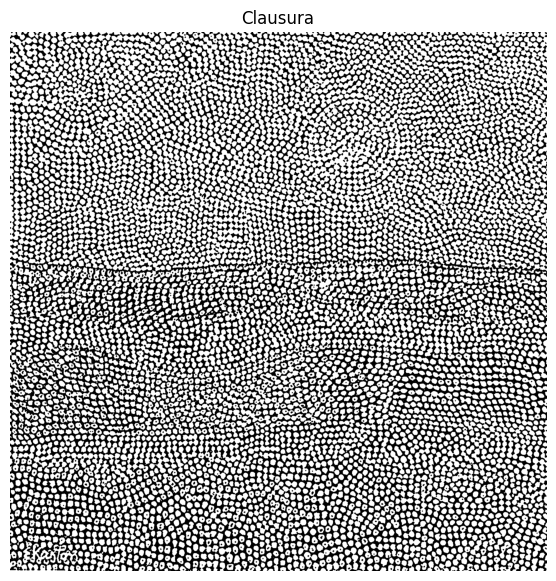

In [ ]:
# Clausura

# Realizar la operación de clausura en la imagen umbralizada
radio = 2
kernel = disk(radio)
imagen_clausura = closing(imagen_umbralizada2, footprint=kernel)

# Mostrar la imagen después del cierre
plt.figure(figsize=(7, 7))
plt.imshow(imagen_clausura, cmap=plt.cm.gray)
plt.title("Clausura")
plt.axis('off')
plt.show()

El efecto de la clausura suaviza los contornos de los objetos y une los que están separados, llenando los agujeros dentro de los objetos.

**Decidir qué elemento estructural, y por qué, es el más adecuado. Indicar también el tamaño del elemento estructural que se ha decidido escoger.**

---

Después de haber probado varios tamaños, puesto que los elementos de la imagen son muy pequeños y están muy cerca unos de otros, hemos utilizado un kernel pequeño de radio 2, semejante al tamaño de cada círculo en este.

En cuanto al elemento estructural más adecuado, como hemos dicho anterormente, hemos escogido el círculo por su semejanza a los elementos del mosaico que queremos contabilizar.

**¿Qué operador o secuencia de operadores elegiríais?**

---

Elegiría apertura (primero erosión y luego dilatación) puesto que me parece que con esta operación encontramos la mejor diferenciación de círculos. Es capaz de separar los objetos que están muy próximos entre sí, que es lo que queremos para poder contar bien los círculos de la imagen.
De todas formas, en la parte de contabilización de círculos podremos comprobar si este era el mejor operador o no. El operador que mayor número de círculos nos de, significará que ha sido capaz de separar mejor los círculos y por tanto los ha podido contabilizar. (Considerando que los operadores han sido capaces de eliminar los elementos externos, el ruido).

**Una vez elegido operador y elemento estructural, repetir este mismo proceso (es decir, elegir operador y elemento estructural), para la imagen complementaria, ¿qué conclusiones sacas de esto?**

---



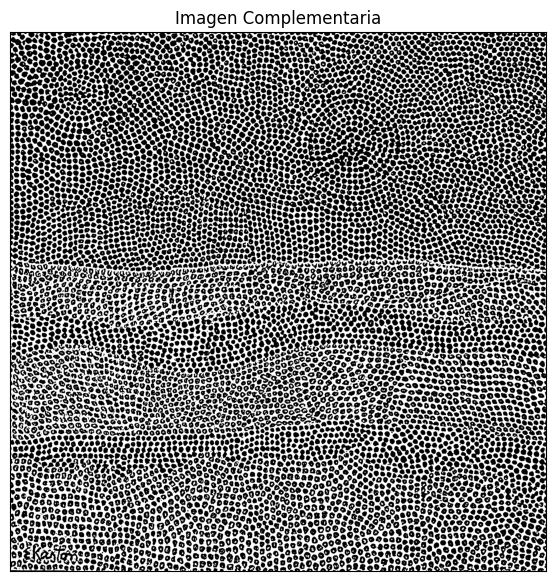

In [ ]:
# Crear la imagen complementaria
imagen_complementaria = 1 - imagen_umbralizada2  # Invertir los valores de intensidad

# Mostrar la imagen complementaria
imshow(imagen_complementaria, "Imagen Complementaria")

Ahora vamos a utilizar la apertura en esta imagen para ver como sería y si conseguimos definir mejor los círculos. En esta imagen se aprecia como hay agujeros dentro de los círculos, lo que puede dificultar la contabilización, así como algún círculo que no está cerrado del todo

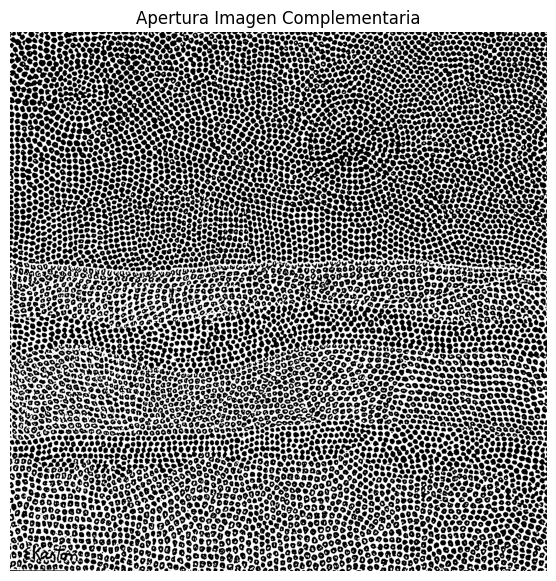

In [ ]:
# Apertura

# Realizar la operación de apertura en la imagen complementaria
radio = 2
kernel = disk(radio)
imagen_apertura_complementaria = opening(imagen_complementaria, footprint=kernel)

# Mostrar la imagen después de la apertura
plt.figure(figsize=(7, 7))
plt.imshow(imagen_complementaria, cmap=plt.cm.gray)
plt.title("Apertura Imagen Complementaria")
plt.axis('off')
plt.show()

Los círculos están bien separados, no obstante no hemos conseguido solucionar el tema de los agujeros, o los círculos no cerrados. Hacer la apertura en la complementaria, nos da el mismo resultado pero con los colores invertidos. Podemos probar a contabilizar los círculos de este para comprobar que es capaz de contar los círculos aunque estén invertidos.

# Contando círculos

Haciendo uso de las funcionalidades cargadas al principio, se pide hacer una función que:
- Reciba como parámetro una imagen binaria
- Compruebe que es binaria y si no es binaria, deberá imprimir por pantalla que no es binaria
- Cuente el número de círculos dentro de la imagen.
- Devuelva (return) dicho número de círculos.

Por último, ¿qué se podría hacer para asegurar que no se tienen en cuenta posibles errores en la umbralización como pequeños puntos o posible ruido que haya llegado hasta este punto?

In [ ]:
# Función para contar el número de círculos
def count_circles(imagen_binaria):
  # Haz cosas
  num_circulos = 'pongo esto solo para que veais cómo sería la estructura'
  return num_circulos

In [ ]:
def count_circles(imagen_apertura):
    # Comprobar si la imagen es binaria
    if not (imagen_apertura.min() == 0 and imagen_apertura.max() == 1):
        print("La imagen no es binaria.")
        return None


    # Etiquetar los objetos en la imagen binaria
    labeled_image = label(imagen_apertura)

    # Contar el número de objetos circulares
    num_circulos = 0
    for region in regionprops(labeled_image):
        # Calcular el aspecto circular del objeto
        circularidad = 4 * 3.1416 * region.area / (region.perimeter ** 2)
        if circularidad > 0.7:  # Ajustar este umbral según tus necesidades
            num_circulos += 1

    return num_circulos

Ya hemos creado la función. Hemos utilizado la imagen una vez hecha la morfología matemática de apertura, puesto que se diferenciaban bien los círculos y ya estaba en binaria.

Ahora ponemos en práctica la función:

In [ ]:
# Apertura
count_circles(imagen_apertura)

3340

También vamos a probar a utilizar esta función con una imagen que sabemos que está en escala de grises, para comprobar que funciona adecuadamente. Usamos la imagen que convertimos en escala de grises al principio del ejercicio:

In [ ]:
count_circles(imagen_gris)

La imagen no es binaria.


Queríamos comprobar cual de todos los operadores nos daba un mayor número de círculos para asi obtener el mejor método de contabilización:

In [ ]:
# Erosión
count_circles(imagen_erosion2)

<ipython-input-34-c3bc78a4cbe5>:15: RuntimeWarning: divide by zero encountered in double_scalars
  circularidad = 4 * 3.1416 * region.area / (region.perimeter ** 2)


4401

In [ ]:
# Dilatación
count_circles(imagen_dilatacion)

258

In [ ]:
# Clausura
count_circles(imagen_clausura)

<ipython-input-34-c3bc78a4cbe5>:15: RuntimeWarning: divide by zero encountered in double_scalars
  circularidad = 4 * 3.1416 * region.area / (region.perimeter ** 2)


1285

Después de erosión, apertura es el que mayor número de círculos nos ofrece. Por lo tanto, hemos sido capaces de separar bien los círculos y contabilizar la mayoría de estos. (Tendrían que salir más círculos, lo que nos indica que el procesamiento no ha sido del todo óptimo).

Por último, también queríamos comprobar si el número de círculos de la imagen invertida era igual, para comprobar si es capaz de contabilizar los círculos independientemente de si la imagen está invertida o no. Por ello:

In [ ]:
# Apertura complementaria
count_circles(imagen_apertura_complementaria)

989

El número de círculos contabilizados en la imagen invertida es mucho menor que el de la imagen original (989 < 3340). Esto implica que nuestra función no es capaz de detectar bien los contornos con la imagen complementaria.

Cuenta como 0 lo que antes era 1; contamos lo contrario a los círculos.

**Por último, ¿qué se podría hacer para asegurar que no se tienen en cuenta posibles errores en la umbralización como pequeños puntos o posible ruido que haya llegado hasta este punto?**

---

Para asegurar que no se tienen en cuenta posibles errores en la umbralización, se pueden aplicar técnicas de eliminación de ruido y filtrado a la imagen binaria antes de realizar operaciones de morfología matemática:

- Filtrado de Tamaño de Objeto: Podemos eliminar pequeños puntos o regiones no deseadas en la imagen binaria mediante el filtrado por tamaño de objeto. Esto significa que eliminaríamos objetos que tienen un número de píxeles por debajo de un cierto umbral. Scikit-Image proporciona funciones para medir y filtrar objetos por tamaño, como regionprops y remove_small_objects.
- Operaciones de Cierre: Aplicar una operación de cierre después de la umbralización puede ayudar a cerrar pequeños huecos o eliminar puntos de ruido que se encuentran dentro de los objetos de interés. Esto puede mejorar la conectividad y la forma de los objetos en la imagen.
- Filtrado por Forma: Si los objetos en la imagen deben tener formas específicas (círculos), se puede aplicar un filtrado basado en la forma de los objetos. Esto implica medir características como la circularidad o la relación de aspecto de los objetos y eliminar aquellos que no cumplan con los criterios de forma deseada.

Combinando estas técnicas podríamos obtener los resultados deseados y asegurarnos de que la umbralización y las operaciones de morfología matemática se aplican de manera más precisa.

# (Bonus) Automatizamos el proceso de extracción

Esta sección no es obligatoria pero la pongo para aquellos que quieran saber "¿y ahora qué se haría?".

Lo que hemos hecho hasta ahora es:
- Encontrar un método de umbralización adecuado (que tiene unos parámetros que ya hemos fijado - según nuestro criterio)
- Hemos utilizado unos métodos de morfología matemática, también con sus parámetros

Es decir, tenemos varios parámetros y tenemos una función que nos dice cuál es el número de puntos dada una imagen. Variando dichos parámetros, variará también el número de puntos, pero no parece haber una relación directa.

También no hay que olvidar que desconocemos el número de puntos (nunca se ha dicho, aunque siempre puedes contarlos), por lo que no podemos seguir un proceso de aprendizaje supervisado (tipo descenso del gradiente sobre los parámetros anteriores para encontrar el mejor resultado).

Pero lo que sí podemos hacer es iterar el valor de los parámetros para alcanzar un máximo de puntos (asumiendo que dicho máximo corresponderá con el mejor resultado). Esto suele hacerse cuando no sabemos exáctamente el resultado que esperamos.

En definitiva, ahora se buscaría realizar un proceso iterativo para encontrar el valor máximo del número de puntos. Para ello haría falta:
- Crear una función que englobe todos los procesos anteriores (umbralización, morfología matemática, etc...) y que tome como parámetro de entrada una imagen en color y devuelva el número de puntos.
- Crear los intervalos donde variarán todos los parámetros que queremos ir modificando
- Crear un proceso iterativo que vaya recorriendo todas las combinaciones de elementos (se recomienda el uso de `product` del paquete `itertools`).
- Una vez terminado el proceso quedarnos con la combinación de paráteros ganadora y el resultado del número de puntos.

Podría decirse que esa combinación de parámetros es la mejor.
